In [27]:
import pandas as pd
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("Processed_Data.csv")

X = data.drop(columns = ['Churn', 'customerID'])
y = data['Churn']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [5]:
model = xgb.XGBClassifier()    # Choosing a model

model.fit(X_train, y_train)    # Training the model

y_pred = model.predict(X_test)    #  Making predictions

In [6]:
model.predict(X_test[:1])

array([0])

In [7]:
model.predict_proba(X_test[:1])

array([[0.98782456, 0.01217546]], dtype=float32)

In [8]:
### Calculating Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [9]:
print(f"Precision:{precision:.2f}")
print(f"Accuracy:{accuracy:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1:{f1:.2f}")
print(f"Confusion matrix:{matrix}")

Precision:0.62
Accuracy:0.79
Recall:0.51
F1:0.56
Confusion matrix:[[917 118]
 [182 192]]


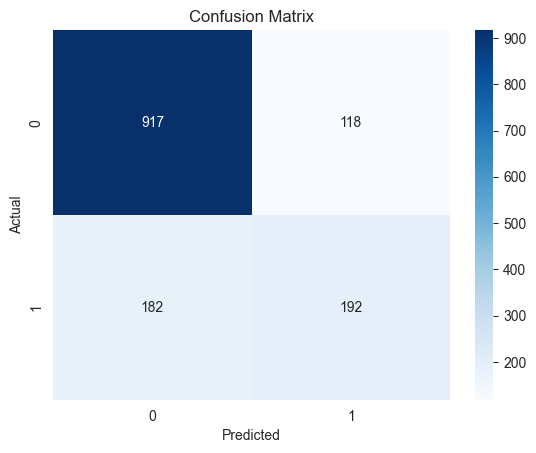

In [10]:
sns.heatmap(matrix, annot=True, fmt='d', cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
explainer = shap.TreeExplainer(model, X_train)   # Creating a shap explainer

shap_values = explainer(X_test)      # Getting shap values on testing data features

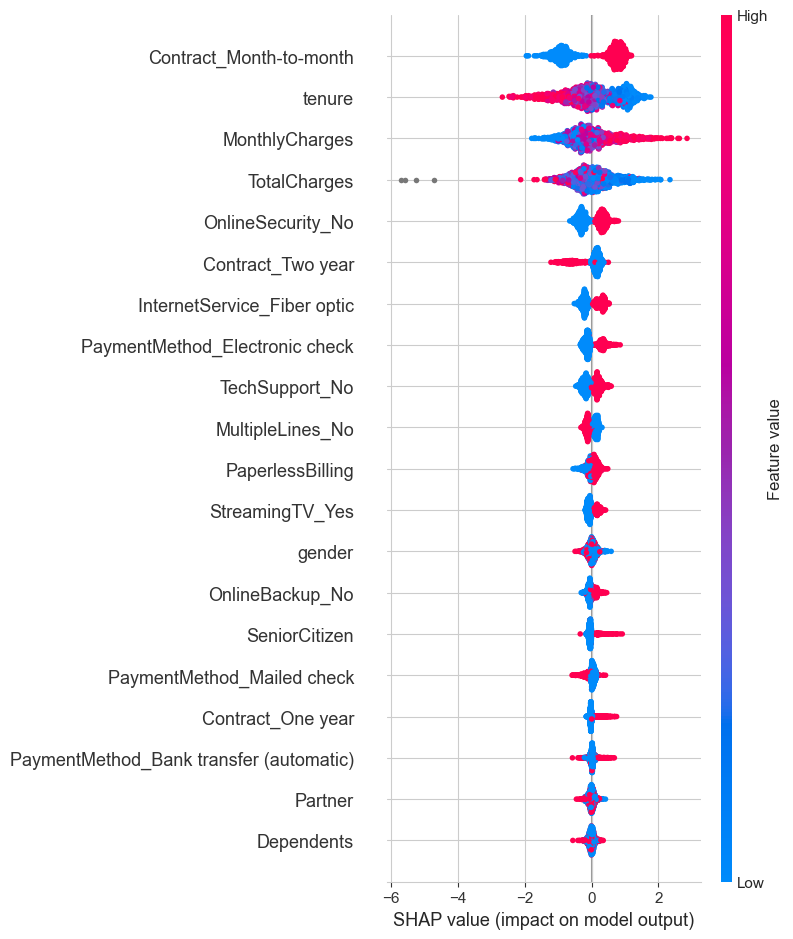

In [12]:
shap.summary_plot(shap_values, X_test)

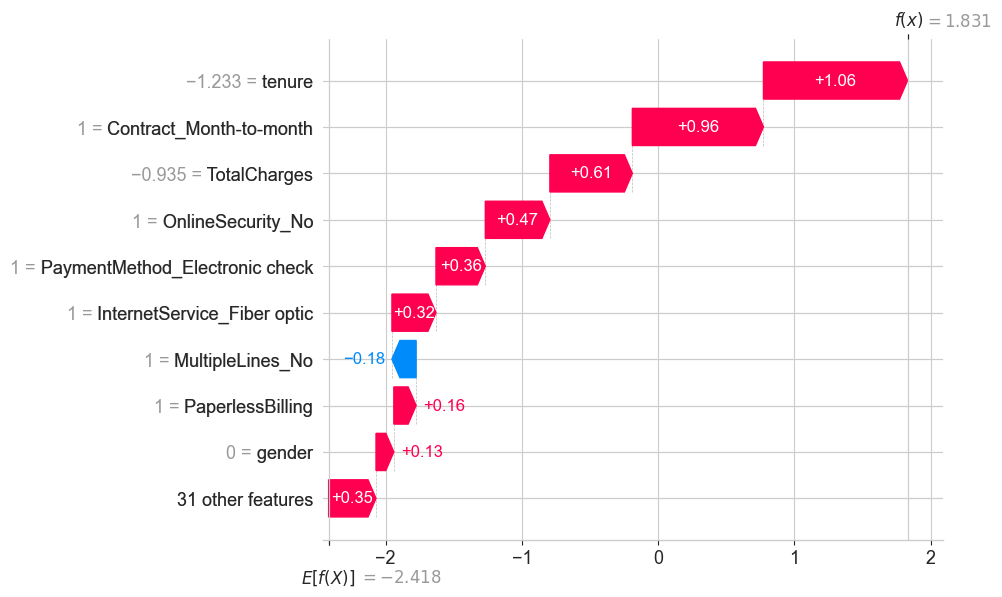

In [13]:
shap.waterfall_plot(shap_values[5])

In [19]:
i = 0
for i in range(len(X_test)):
  row = X_test[i:i+1]
  prediction = model.predict_proba(row)
  shap_value = explainer(row)


In [26]:
shap_value.values

array([[ 0.58753915, -0.00274851,  0.39530812,  0.06725289, -0.03651264,
        -0.02719193, -0.03926304, -0.00785166, -0.1967316 ,  0.02164895,
         0.        ,  0.0019117 , -0.06104565, -0.08347687,  0.        ,
         0.23485517,  0.        ,  0.00886613,  0.06134965,  0.        ,
         0.04376605,  0.18064396,  0.        , -0.03370617, -0.2716537 ,
         0.        ,  0.01349114,  0.0045944 ,  0.        ,  0.27389685,
         0.01473273,  0.        ,  0.20662227, -0.89546085,  0.41651565,
         0.16040696,  0.01800081, -0.00938228, -0.08948958, -0.10363065]])